# Performance Evaluation

# Strategy return analysis

In [1]:
#########
# Setup
#########
import pandas as pd
import bt
import talib

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# get data
bt_data = bt.get('goog, amzn, tsla',
                 start='2018-1-1') # end = current date by default

# Create strategy
bt_strategy = bt.Strategy('Trade_Weekly', # name assignemnt to strategy
                         [bt.algos.RunWeekly(), # Run weekly
                          bt.algos.SelectAll(), # Use all data
                          bt.algos.WeighEqually(), # Maintain equal weights
                          bt.algos.Rebalance()]) # Rebalance

# create a backtest
bt_test = bt.Backtest(bt_strategy, bt_data)

# run the backtest
bt_results = bt.run(bt_test)

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


## Obtain detailed backtest stats
In previous lessons we have built and backtested several trading strategies and visualized the strategy performance. Now let's look into the details of the backtest statistics. Suppose we have a strategy backtest result saved in bt_result. We can obtain all **backtest statistics by calling  bt_results.stats** and saving it in a DataFrame. The DataFrame is indexed by various performance metrics. There is a lot of information here, so let's focus on several important ones.

In [3]:
result_info = bt_results.stats
result_info.index

Index(['start', 'end', 'rf', 'total_return', 'cagr', 'max_drawdown', 'calmar',
       'mtd', 'three_month', 'six_month', 'ytd', 'one_year', 'three_year',
       'five_year', 'ten_year', 'incep', 'daily_sharpe', 'daily_sortino',
       'daily_mean', 'daily_vol', 'daily_skew', 'daily_kurt', 'best_day',
       'worst_day', 'monthly_sharpe', 'monthly_sortino', 'monthly_mean',
       'monthly_vol', 'monthly_skew', 'monthly_kurt', 'best_month',
       'worst_month', 'yearly_sharpe', 'yearly_sortino', 'yearly_mean',
       'yearly_vol', 'yearly_skew', 'yearly_kurt', 'best_year', 'worst_year',
       'avg_drawdown', 'avg_drawdown_days', 'avg_up_month', 'avg_down_month',
       'win_year_perc', 'twelve_month_win_perc'],
      dtype='object')

## Strategy returns
The most basic metric for strategy performance evaluation is the **rate of return**. A rate of return is the **net gain or loss of a portfolio or asset over a specified time period**, for example daily, monthly, or yearly. To obtain the rate of return for different time periods, we can slice the stats dataframe result_info by the metric names. For example, use **daily_mean**, **monthly_mean and yearly_mean** to get the daily, monthly, and annual return respectively. In the code, we format the output to be float numbers with 4 decimal points using the expression after the percentage sign operator. In the output, for example, the daily return is shown as point 1966 or 19 point 66 percent.

___
$
Return = \Large\frac{V{e} - V{b}}{V{b}}
$


$V_{e}$: ending value <br>
$V_{b}$: beginning value

___

In [4]:
print('Daily return: %.4f'% result_info.loc['daily_mean'])
print('Monthly return: %.4f'% result_info.loc['monthly_mean'])
print('Yearly return: %.4f'% result_info.loc['yearly_mean'])

Daily return: 0.5155
Monthly return: 0.4856
Yearly return: 0.7703


## Compound annual growth rate
Another useful return metric is called **compound annual growth rate**, or **CAGR**. It is the rate of return that would be required for an asset or trading account to grow from its beginning balance to its ending balance, assuming all the profits were reinvested at the end of each year. For example, an asset may increase in value by 8% in one year, decrease in value by 3% the following year and increase in value by 5% in the next. **CAGR helps smooth returns when growth rates are expected to be volatile and inconsistent**. It also makes different alternative results easier to compare. We can obtain the CAGR by slicing the stats DataFrame with the name cagr.

___
$
CAGR = \Large\frac{V_{f}}{V_{i}}^{\frac{1}{n}} - 1
$
___
$V_{f}$: final value <br>
$V_{i}$ : initial value<br>
**n**:     number of years <br>
___

In [5]:
# get CAGR
print('CAGR: %.4f'% result_info.loc['cagr'])

CAGR: 0.5733


## Plot return histogram
We can plot the return histogram to check the distribution of returns. This is easily done by calling plot underscore histograms on bt underscore result. Use the freq argument to specify the return frequencies to be plotted, for example w for weekly. By default it will plot a histogram based on daily returns.

<Figure size 432x288 with 0 Axes>

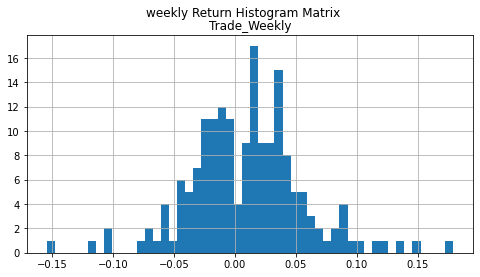

In [6]:
bt_results.plot_histograms(bins=50, freq='w',figsize=(8,4))
plt.show()

## Compare strategy lookback returns
In addition, we can compare the return results of multiple strategies side by side. Suppose we have run a strategy optimization and have two backtest results saved in bt underscore results. Call display underscore lookback underscore returns on it, and we can compare the lookback returns of both strategies.

In [7]:
# Get lookback reuturns
lookback_returns = bt_results.display_lookback_returns()
lookback_returns

,Trade_Weekly
mtd,-6.20%
3m,5.92%
6m,15.52%
ytd,8.51%
1y,122.59%
3y,63.55%
5y,nan%
10y,nan%
incep,57.33%


# Drawdown

## What is a drawdown?
A drawdown is a **peak-to-trough decline during a specific period** for an asset or a trading account. A drawdown is usually quoted as the percentage between the peak and the subsequent trough. If a trading account has 1000 in it, and the fund drops to 900 before moving back above 1000, then the trading account has experienced a 10% drawdown. **Drawdowns are a measure of downside volatility.**

<img src="https://github.com/alimirr/algorithmic_trading_in_python/blob/main/assets/drawdown.png?raw=true" alt="Drawing" style="width: 700px;"/>

## Max drawdown
A max drawdown is the **maximum observed loss from a peak to a trough** of an account, before a new peak is established. Max drawdown is an indicator of downside risk over a specified time period. For example, if an account begins with a value of 1000, increases in value to 1700 (point A), decreases to 900 (point B), increases to 1400 (point C), then decreases to 800 (point D), then increases to 2000 (point E), the max drawdown is 1700 (at point A) minus 800 (at point D) then divided by 1700, or about 53%.

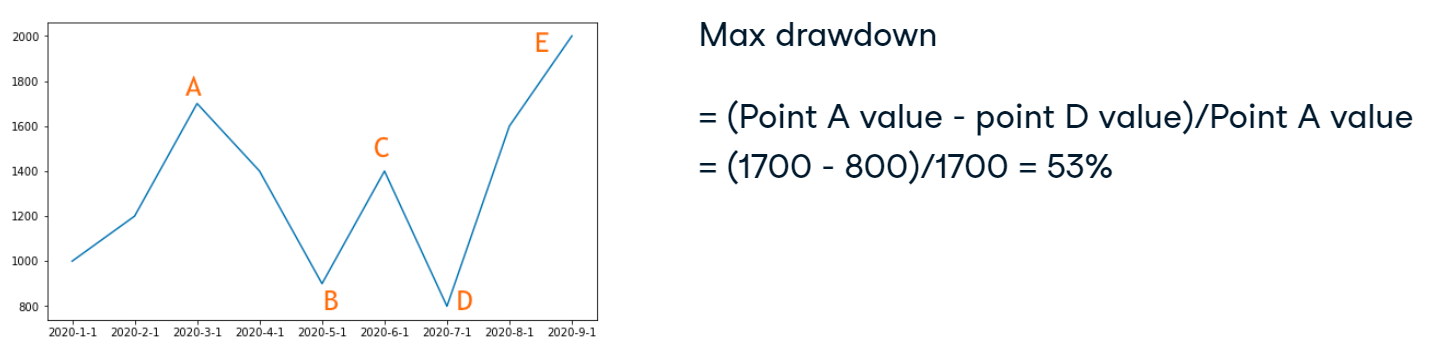

___
$\Large\frac{V_{p}-V_{l}}{V_{l}}$

$V_{p}$: Peak value before largest drop<br>
$V_{l}$: Lowest value before a new high value<br>
___

## Obtain drawdowns from backtest stats
We can get various types of drawdown results, such as max drawdown, average drawdown, and average drawdown days from the stats DataFrame as the sample code demonstrates. 

* **Average drawdown** is the mean drawdown percentage during the strategy backtest period 
* **Average drawdown days** equals the number of days on average that the portfolio or account would remain in a drawdown period.

In [8]:
# Get max drawdown
max_drawdown = result_info.loc['max_drawdown']
print('Maximum Drawdown: %.2f'% max_drawdown)

# Get average drawdown
avg_drawdown = result_info.loc['avg_drawdown']
print('Average Drawdown: %.2f'% avg_drawdown)

# Get average drawdown days
avg_drawdown_days = result_info.loc['avg_drawdown_days']
print('Average Drawdown Days: %.0f'% avg_drawdown_days)

Maximum Drawdown: -0.37
Average Drawdown: -0.05
Average Drawdown Days: 24


## The Calmar ratio
The Calmar ratio was created by a hedge fund manager named Terry Young and first published in 1991. The name Calmar is an acronym of Young's company name and its newsletter: California Managed Accounts Report. Calmar ratio is calculated as a portfolio or account's compounded annual growth rate, or CAGR, divided by its max drawdown. People also refer to the Calmar ratio as the drawdown ratio. Since the max drawdown is a measure of downside risk, the **higher the Calmar ratio, the better a strategy performed** on a risk-adjusted basis during the given timeframe. As a rule of thumb a **Calmar ratio larger than 3 is considered excellent.**

$\Large Calmar = \frac{CAGR}{Max Drawdown}$

## Calculate the Calmar ratio manually
We can calculate the Calmar ratio manually using stats from the backtest result. As the sample code demonstrates, the Calmar ratio equals the CAGR divided by the max drawdown, both are available by slicing the stats DataFrame. Doing so can give us an intuitive understanding of how the Calmar ratio is obtained. Also note the max drawdown is multiplied by minus 1 during the calculation to convert the result to a positive number. It is formatted to print a float number with 2 decimal points.

In [9]:
# Calculate Calmar

# Get CAGR
cagr = result_info.loc['cagr']
# Get Max Drawdown
max_drawdown = result_info.loc['max_drawdown']

# Calculate Calmar ratio manually
calmar_calc = cagr/max_drawdown*(-1) # max drawdown is multiplied by minus 1 during the calculation to convert the result to a positive number
print("Calmar Ratio Calculated: %.2f"% calmar_calc)

Calmar Ratio Calculated: 1.55


## Obtain the Calmar ratio from backtest stats
We can also get the Calmar ratio directly from the backtest result stats by referring to the name calmar.

In [10]:
calmar = result_info.loc['calmar']
print("Calmar Ratio: %.2f"% calmar)

Calmar Ratio: 1.55


# Sharpe ratio and Sortino ratio

## Which strategy performs better?
Think for a second: in terms of return, is bigger always better? Suppose we have two strategies with the following results. Strategy 1 has a 15% return and 30% volatility, measured by the return standard deviation. Strategy 2 has a 10% return and 8% volatility. Which strategy do you think has better performance? Remember your pick and we return to this later.

## Risk-adjusted return
To make performance comparable among different strategies, we should **take both return and risk into consideration**. Hence, risk-adjusted return is a ratio introduced to assess a strategy performance by measuring how much risk is involved in producing a certain level of return. In this context, is a bigger return always better? Not necessarily. For example, a 20% return is impressive. But if it comes with a return volatility of 40% due to trading speculative or risky assets, the performance is actually moderate from a risk-adjusted perspective.

## Sharpe ratio
One risk-adjusted return measure is called the **Sharpe ratio**, developed by Nobel Laureate William F.Sharpe. The Sharpe ratio is calculated as the **average return in excess of the risk-free rate, divided by the excess return volatility, ie standard deviation**. The risk-free rate is usually the equivalent of a safe risk-free bond, such as US Treasuries or UK Gilts. Under the current low interest rate or even negative interest rate environment in the US and Europe, we can assume the risk-free rate to be zero. The Shape ratio provides a simple way to measure return obtained per unit of risk. 

In general, **the bigger the Sharpe ratio, the more attractive the risk-adjusted return.**

$ \Large Sharpe Ratio = \frac{R_{p} - R_{r}}{\sigma_{p}}$<br>
$ R_{p}$: Return of a strategy, portfolio, asset, etc.<br>
$ R_{r}$: Risk-free rate<br>
$ \sigma_{p}$: Standard deviation of the excess return ($R_{p} - R_{f}$) <br>

## Now choose again
Now let's return to the previous question. Given the information we can calculate the Sharpe ratio for each strategy. 

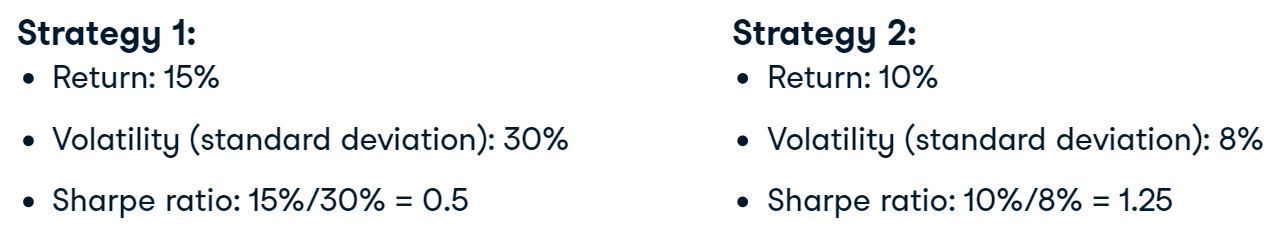

Strategy 1 has a Sharpe ratio of .5 and strategy 2 has 1.25. 

Clearly, strategy 2 performs better since it generates 1.25 units of excess return per unit of risk, compared to only .5 of strategy 1.

## Obtain Sharpe ratio from bt backtest 
To obtain the Sharpe ratio from bt backtest result, first call .stats to obtain all backtest statistics and save them in a DataFrame. Then we can get the Sharpe ratio by slicing the DataFrame. There are daily, monthly and yearly Sharpe ratios available from the stats. In addition, we formatted the output to print a float with two decimals places.

In [11]:
# Get Sharpe Ratios from the backtest stats
print('Sharpe Ratio daily: %.2f'% result_info.loc['daily_sharpe'])
print('Sharpe Ratio monthly: %.2f'% result_info.loc['monthly_sharpe'])
print('Sharpe Ratio yearly: %.2f'% result_info.loc['yearly_sharpe'])


Sharpe Ratio daily: 1.46
Sharpe Ratio monthly: 1.39
Sharpe Ratio yearly: 0.76


## Calculate Sharpe ratio manually
We can also calculate the Sharpe ratio using the annual return and volatility from the stats manually as shown in the code. This calculation enables us to see each component of the Sharpe ratio.

In [12]:
# Obtain Annual return
annual_return = result_info.loc['yearly_mean']
# Obtain Volatility
volatility = result_info.loc['yearly_vol']

# Calculate Sharpe ratio
sharpe_ratio = annual_return/volatility
print("Manual yearly Sharpe ratio: %.2f"% sharpe_ratio)

Manual yearly Sharpe ratio: 0.76


## Limitations of Sharpe ratio
Despite the benefits afforded by its simplicity, the Sharpe ratio is **criticized for using the total return volatility in the calculation**. In other words, **it does not distinguish good/upside volatility from bad/downside volatility**, and punishes both equally. In reality, upside volatility, although desirable, can skew the results downward, resulting in a lower Sharpe ratio. It hence paints an inaccurate picture of the risk-reward efficiency.

## Sortino ratio
To address this deficiency, the Sortino ratio is a modification of the Sharpe ratio. Instead of using total volatility, the return in excess of the risk-free rate is divided by the downside volatility, or downside deviation of the return. In other words, only the downside risk will be punished.
___
$\Large Sortino Ratio = \frac{R_{p} - R_{r}}{\sigma_{d}}$<br>
$R_{p}:$ Return of a strategy, portfolio, asset, etc.<br>
$R_{r}:$ Risk-free rate <br>
$\sigma_{d}$: Downside deviation of the excess return $(R_{p} - R_{f})$<br>
___

## Obtain Sortino ratio from bt backtest
We can obtain the Sortino ratio from the backtest statistics in a similar way as the Sharpe ratio. There are daily, monthly, and yearly Sortino ratios available. **The bigger the Sortino ratio, the better the performance.**

In [13]:
# Get Sortino ratio from backtest stats
print("Sortino ratio daily: %.2f"% result_info.loc['daily_sortino'])
print("Sortino ratio monthly: %.2f"% result_info.loc['monthly_sortino'])
print("Sortino ratio yearly: %.2f"% result_info.loc['yearly_sortino'])

Sortino ratio daily: 2.43
Sortino ratio monthly: 4.03
Sortino ratio yearly: inf
